<a href="https://colab.research.google.com/github/yuktiarora0412/Summer-bootcamp-project/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

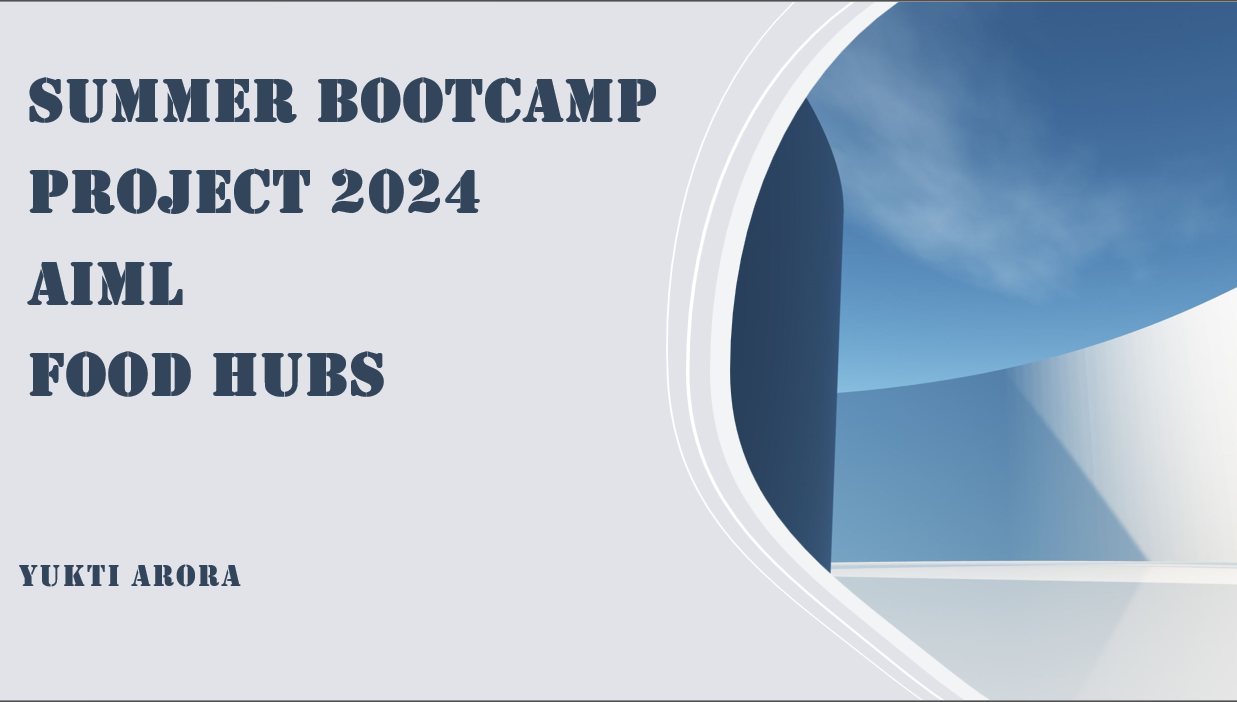

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv('/content/2-foodhub_order_New.csv')


###DATA CLEANING AND PREPROCESSING

In [ ]:
df.head().T

,0,1,2,3,4
order_id,1477147,1477685,1477070,1477334,1478249
customer_id,337525,358141,66393,106968,76942
restaurant_name,Hangawi,Blue Ribbon Sushi Izakaya,Cafe Habana,Blue Ribbon Fried Chicken,Dirty Bird to Go
cuisine_type,Korean,Japanese,Mexican,American,American
cost_of_the_order,30.75,12.08,12.23,29.2,11.59
day_of_the_week,Weekend,Weekend,Weekday,Weekend,Weekday
rating,Not given,Not given,5,3,4
food_preparation_time,25.0,25.0,23.0,25.0,25.0
delivery_time,20,?,28,15,24


OBSERVATION: In 2nd entry there is an anomalie in delivery_time which is'?' instead of an integer.

In [ ]:
df.tail().T

,1893,1894,1895,1896,1897
order_id,1476701,1477421,1477819,1477513,1478056
customer_id,292602,397537,35309,64151,120353
restaurant_name,Chipotle Mexican Grill $1.99 Delivery,The Smile,Blue Ribbon Sushi,Jack's Wife Freda,Blue Ribbon Sushi
cuisine_type,Mexican,American,Japanese,Mediterranean,Japanese
cost_of_the_order,22.31,12.18,25.22,12.18,19.45
day_of_the_week,Weekend,Weekend,Weekday,Weekday,Weekend
rating,5,5,Not given,5,Not given
food_preparation_time,31.0,31.0,31.0,23.0,28.0
delivery_time,17,19,24,31,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


##To change datatype we need to check the datatypes and convert them to object and viceversa.

In [ ]:
df.shape

(1898, 9)

The shape of the dataframe is(1898,9)




In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

It has 0 duplicate values

to change datatype we need to check the datatypes and convert them to object and viceversa.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.0,1477021.25,1477495.50,1477969.75,1478444.0
customer_id,1898.0,1.711685e+05,113698.139743,1311.0,77787.75,128600.00,270525.00,405334.0
cost_of_the_order,1898.0,8.072201e+01,2798.141333,0.0,12.08,14.16,22.31,121920.0
food_preparation_time,1896.0,2.737184e+01,4.634211,20.0,23.00,27.00,31.00,35.0


In [ ]:
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,?


<Axes: >

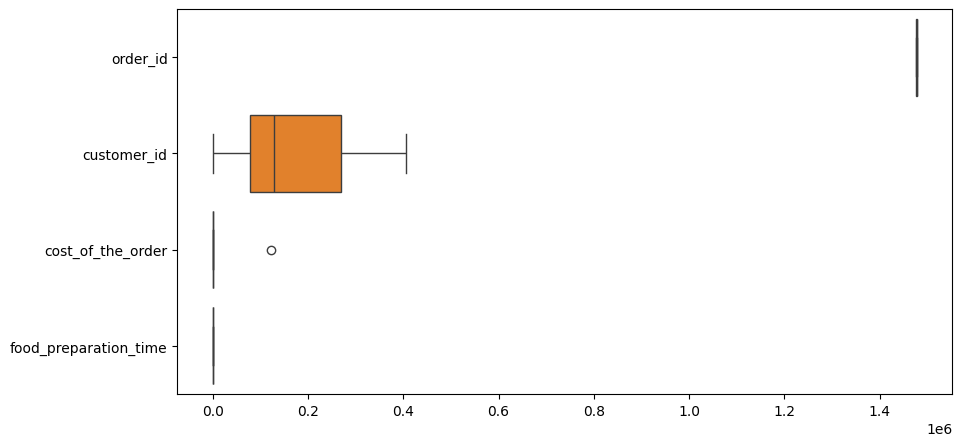

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df, orient="h")

In [ ]:
df['delivery_time']=df['delivery_time'].replace('?',np.nan)

In [ ]:
missing_ratings = df['rating'].isnull().sum()
print("no.of missing ratings",missing_ratings)

no.of missing ratings 0


In [ ]:
df['rating']=df['rating'].replace('not given',np.nan)

In [ ]:
df['rating'] = df['rating'].replace("not given", pd.NA)
df['rating'] = df['rating'].replace("Not given", pd.NA)
df['rating'] = pd.to_numeric(df['rating'])

In [ ]:
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

In [ ]:
food_orders_cleaned = df.dropna(subset=['rating'])

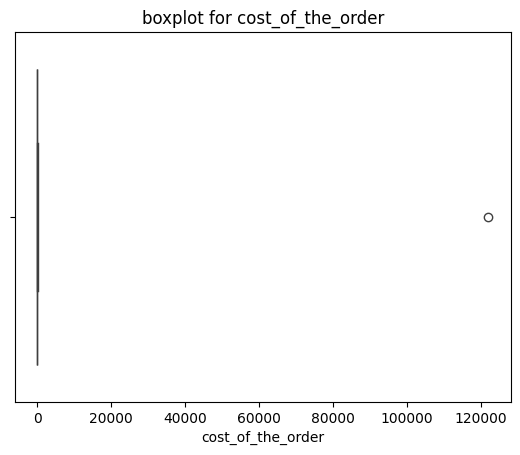

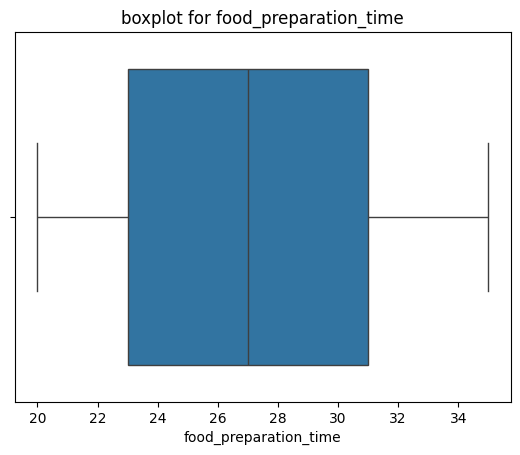

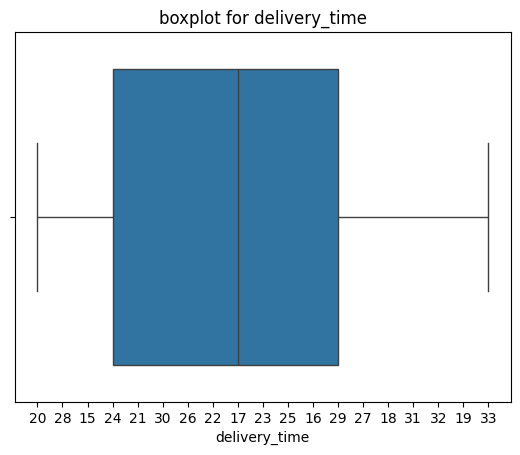

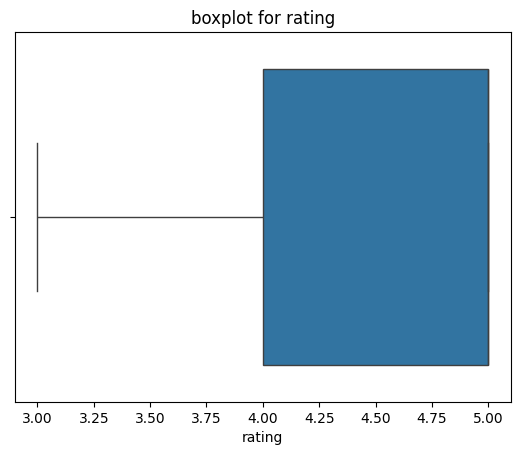

In [ ]:
numcol=['cost_of_the_order','food_preparation_time','delivery_time','rating']
for col in numcol:
  sns.boxplot(x=df[col])
  plt.title(f'boxplot for {col}')
  plt.show()

**ORDER ANALYSIS:**


*   What is the total number of orders in the dataset?

*   What is the average cost of an order?
*   How many unique customers have placed orders?


*  Which restaurant has received the highest number of orders?




In [ ]:
total_orders = len(df)
print("the total no.of orders in dataset are:",total_orders)

the total no.of orders in dataset are: 1898


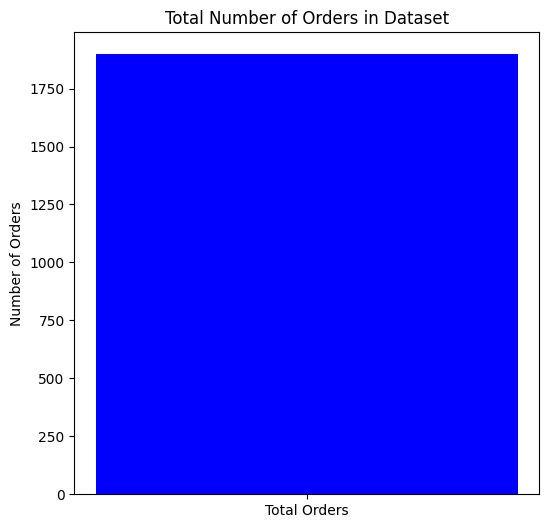

In [32]:
total_orders = len(df)
plt.figure(figsize=(6, 6))
plt.bar(['Total Orders'], [total_orders], color='blue')
plt.ylabel('Number of Orders')
plt.title('Total Number of Orders in Dataset')
plt.show()

In [ ]:
avg_cost = df['cost_of_the_order'].mean()
print("the average cost of the dataset is:",avg_cost)

the average cost of the dataset is: 80.72200737618546


In [ ]:
unq_customers = df['customer_id'].nunique()
print("unique customers are:",unq_customers)

unique customers are: 1200


In [ ]:
most_popular_restaurant = df['restaurant_name'].value_counts().idxmax()
number_of_orders = df['restaurant_name'].value_counts().max()
print("the restaurant with highest number of orders is:",most_popular_restaurant,"with",number_of_orders,"number of orders")

the restaurant with highest number of orders is: Shake Shack with 219 number of orders


**CUSTOMER ANALYSIS**



*   What is the average rating given by customers?
*   How does the rating vary between weekdays and weekends?


*   Which cuisine type is ordered the most?
*   What is the distribution of orders across different days of the week?





In [ ]:
avg_rating = df['rating'].mean()
print("Average rating given by customers:",avg_rating)

Average rating given by customers: 4.344234079173838


<ipython-input-41-2d1814a3b253>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


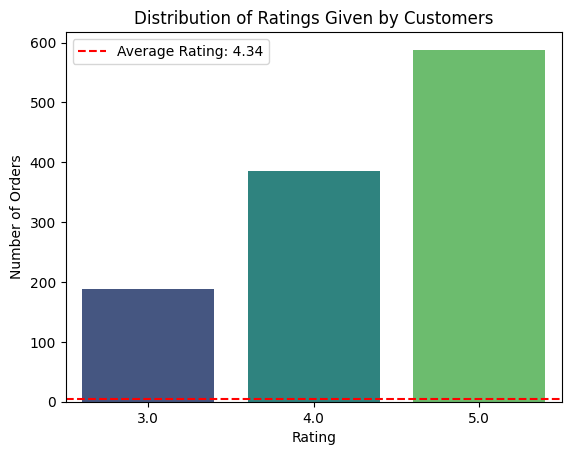

In [41]:
sns.countplot(x='rating', data=df, palette='viridis')
plt.axhline(y=avg_rating, color='red', linestyle='--', label=f'Average Rating: {avg_rating:.2f}')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.title('Distribution of Ratings Given by Customers')
plt.legend()
plt.show()



In [ ]:
average_rating_by_day = df.groupby('day_of_the_week')['rating'].mean()

print("Average rating by day of the week:",average_rating_by_day)

Average rating by day of the week: day_of_the_week
Weekday    4.308824
Weekend    4.358881
Name: rating, dtype: float64


In [ ]:
most_ordered_cuisine = df['cuisine_type'].value_counts().idxmax()
number_of_orders_for_cuisine = df['cuisine_type'].value_counts().max()

print(f"The most ordered cuisine type is: {most_ordered_cuisine} with {number_of_orders_for_cuisine} orders.")

The most ordered cuisine type is: American with 582 orders.


In [ ]:
order_distribution_by_day = df['day_of_the_week'].value_counts()

print("Distribution of orders across different days of the week:")
print(order_distribution_by_day)

Distribution of orders across different days of the week:
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


<ipython-input-42-44eab581ec65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_distribution_by_day.index, y=order_distribution_by_day.values, palette='viridis')


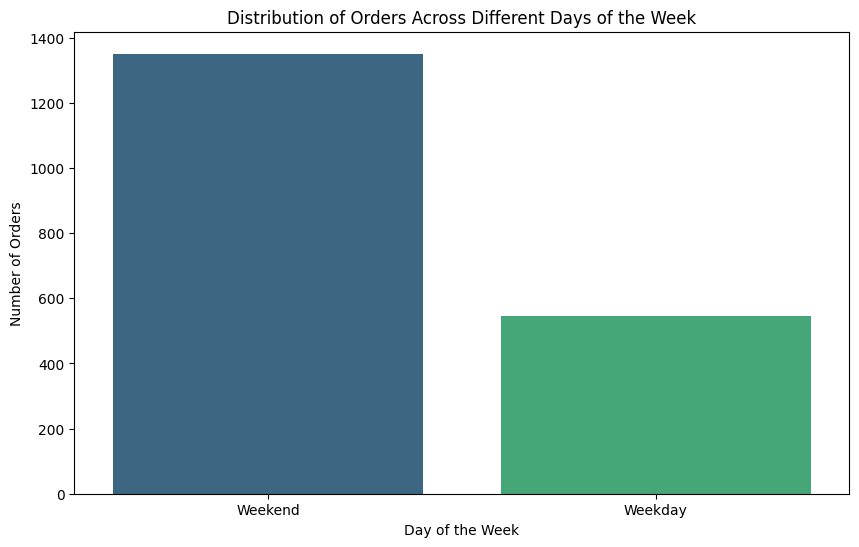

In [42]:
order_distribution_by_day = df['day_of_the_week'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=order_distribution_by_day.index, y=order_distribution_by_day.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders Across Different Days of the Week')
plt.show()



###RESTAURANT PERFORMANCE:


•	What is the average food preparation time for each restaurant?

•	Which restaurant has the shortest average food preparation time?

•	How does the average delivery time compare across different restaurants?

•	Is there a correlation between the cost of the order and the rating given?






In [ ]:
average_prep_time_per_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()

print("Average food preparation time for each restaurant:",average_prep_time_per_restaurant)


Average food preparation time for each restaurant: restaurant_name
'wichcraft          28.000000
12 Chairs           27.000000
5 Napkin Burger     30.200000
67 Burger           20.000000
Alidoro             34.000000
                      ...    
Zero Otto Nove      30.000000
brgr                25.000000
da Umberto          24.333333
ilili Restaurant    26.388889
indikitch           30.750000
Name: food_preparation_time, Length: 178, dtype: float64


<ipython-input-50-21570a7ece60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prep_time_per_restaurant.values, y=average_prep_time_per_restaurant.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


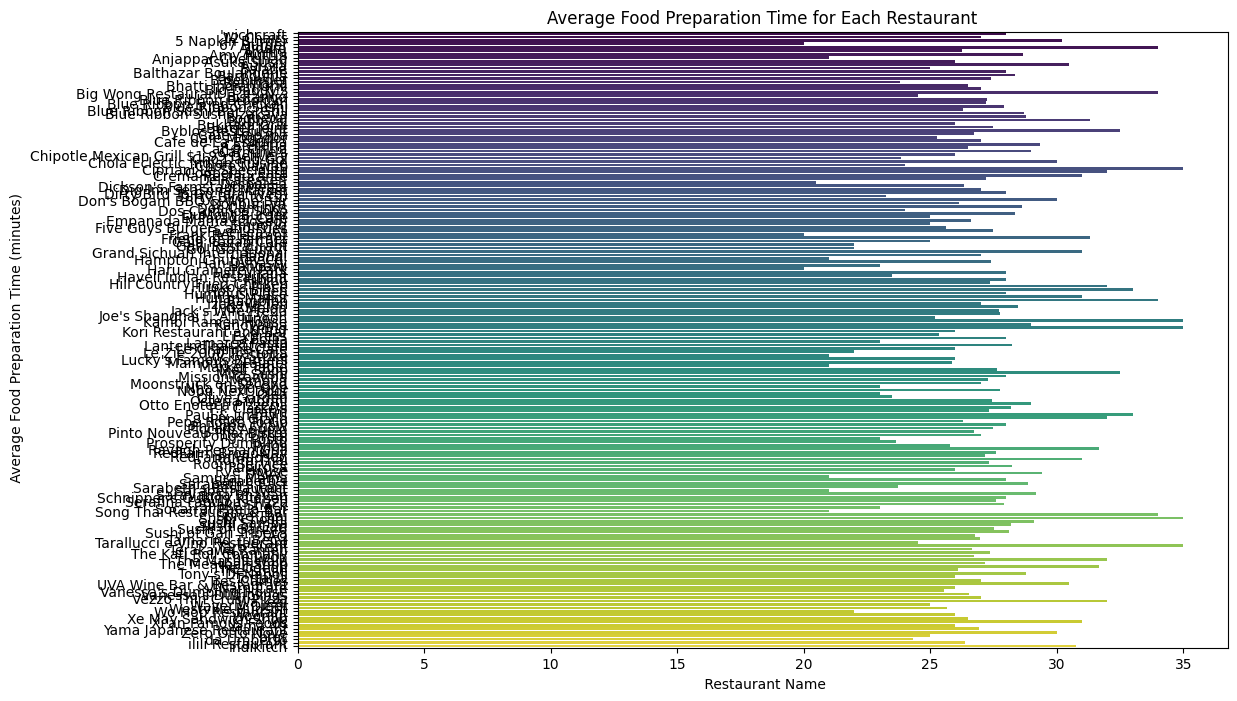

In [50]:
average_prep_time_per_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()
plt.figure(figsize=(12, 8))
sns.barplot(x=average_prep_time_per_restaurant.values, y=average_prep_time_per_restaurant.index, palette='viridis')
plt.xlabel(' Restaurant Name')
plt.ylabel(' Average Food Preparation Time (minutes)')
plt.title('Average Food Preparation Time for Each Restaurant')
plt.show()

In [ ]:
shortest_prep_time_restaurant = average_prep_time_per_restaurant.idxmin()
shortest_prep_time = average_prep_time_per_restaurant.min()

print("The restaurant with the shortest average food preparation time is:",shortest_prep_time)

The restaurant with the shortest average food preparation time is: 20.0


In [ ]:
average_delivery_time_per_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()

print("Average delivery time for each restaurant:",average_delivery_time_per_restaurant)


Average delivery time for each restaurant: restaurant_name
'wichcraft          28.000000
12 Chairs           27.750000
5 Napkin Burger     24.400000
67 Burger           28.000000
Alidoro             22.000000
                      ...    
Zero Otto Nove      21.500000
brgr                25.000000
da Umberto          28.000000
ilili Restaurant    24.888889
indikitch           25.500000
Name: delivery_time, Length: 178, dtype: float64


In [ ]:
correlation_cost_rating = df['cost_of_the_order'].corr(df['rating'])

print("The correlation between the cost of the order and the rating given is:",correlation_cost_rating)

The correlation between the cost of the order and the rating given is: -0.05315881617603318


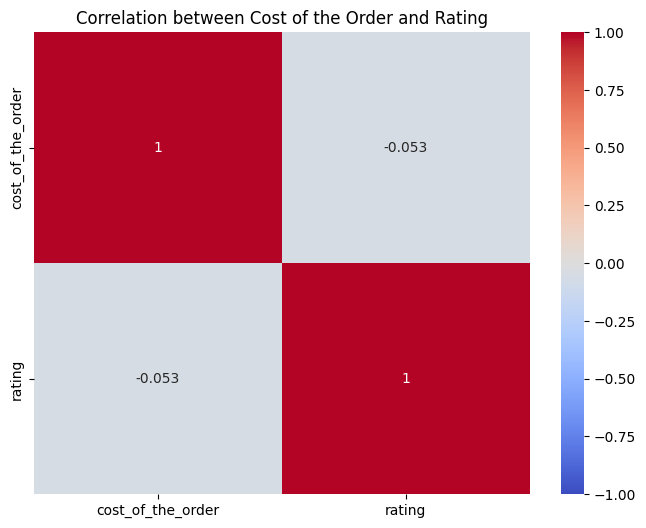

In [39]:
correlation_matrix = df[['cost_of_the_order', 'rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Cost of the Order and Rating')
plt.show()

###4.	DEMAND PATTERNS
•	How does the demand for different cuisine types vary on weekdays versus weekends?

•	Which day of the week has the highest average order cost?

•	What is the most common day for orders to be placed?

•	How does the average rating vary by cuisine type?





In [ ]:

cuisine_demand = df.groupby(['cuisine_type', 'day_of_the_week']).size().unstack()

print("Demand for different cuisine types on weekdays versus weekends:",cuisine_demand)



Demand for different cuisine types on weekdays versus weekends: day_of_the_week  Weekday  Weekend
cuisine_type                     
American             169      413
Chinese               52      163
French                 5       13
Indian                24       49
Italian               91      207
Japanese             135      335
Korean                 2       11
Mediterranean         14       32
Mexican               24       52
Middle Eastern        17       32
Southern               6       11
Spanish                1       11
Thai                   4       15
Vietnamese             3        4


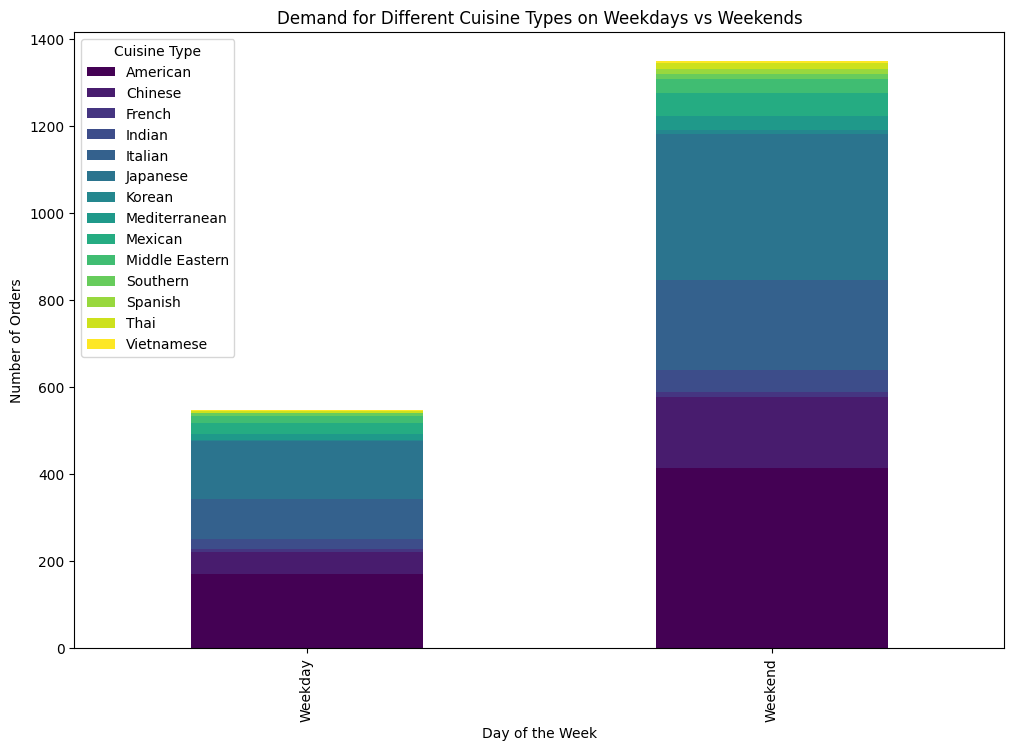

In [46]:
cuisine_demand = df.groupby(['cuisine_type', 'day_of_the_week']).size().unstack()
cuisine_demand.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Demand for Different Cuisine Types on Weekdays vs Weekends')
plt.legend(title='Cuisine Type')
plt.show()

In [ ]:

average_cost_per_day =df.groupby('day_of_the_week')['cost_of_the_order'].mean()

highest_cost_day = average_cost_per_day.idxmax()
highest_cost = average_cost_per_day.max()

print("The day of the week with the highest average order cost is",highest_cost_day,"with an avg cost of:",highest_cost)


The day of the week with the highest average order cost is Weekend with an avg cost of: 106.80099925980754


In [ ]:

most_common_order_day = df['day_of_the_week'].mode()[0]

print("The most common day for orders to be placed is:",most_common_order_day)

The most common day for orders to be placed is: Weekend


In [51]:

average_rating_per_cuisine = df.groupby('cuisine_type')['rating'].mean().T

print("Average rating by cuisine type:",average_rating_per_cuisine)




Average rating by cuisine type: cuisine_type
American          4.298913
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.404255
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64


<ipython-input-47-3024449fdc88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_cuisine.values, y=average_rating_per_cuisine.index, palette='viridis')


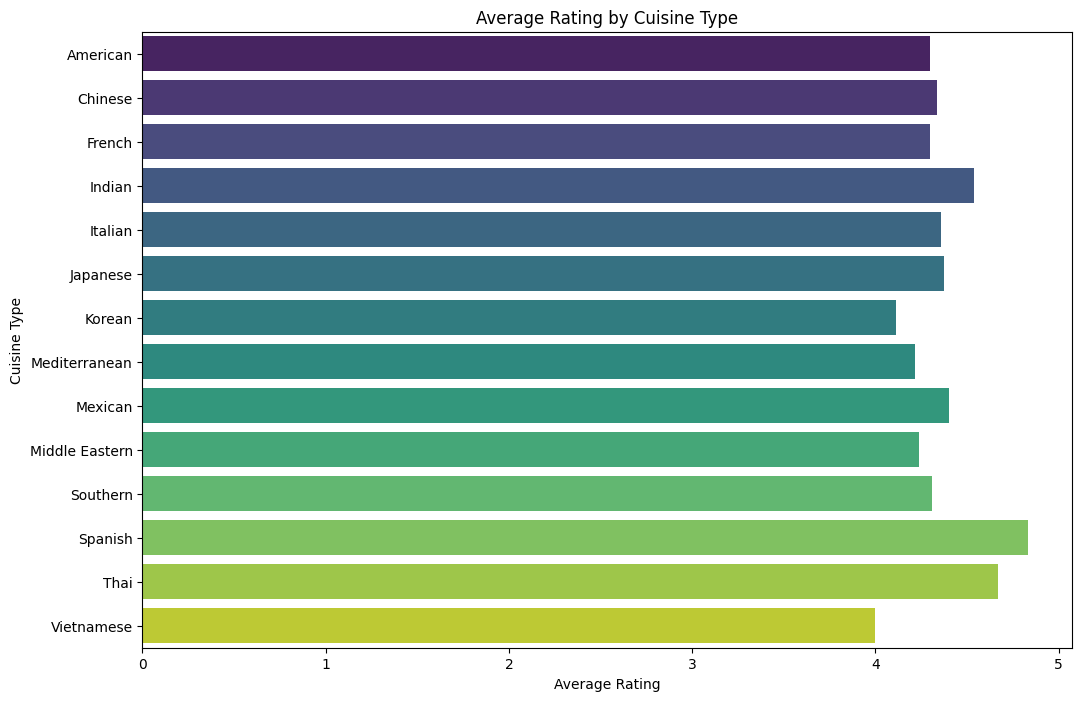

In [47]:
average_rating_per_cuisine = df.groupby('cuisine_type')['rating'].mean()
plt.figure(figsize=(12, 8))
sns.barplot(x=average_rating_per_cuisine.values, y=average_rating_per_cuisine.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Average Rating by Cuisine Type')
plt.show()


###5.	OPERATIONAL EFFICIENCY

•	What is the average delivery time for all orders?

•	Which restaurant has the longest average delivery time?

•	Is there a relationship between food preparation time and delivery time?

•	How does the delivery time impact customer ratings?


In [53]:

average_delivery_time = df['delivery_time'].mean()

print("The average delivery time for all orders is:",average_delivery_time)


The average delivery time for all orders is: 24.162447257383967


In [ ]:

average_delivery_time_per_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()


longest_delivery_time_restaurant = average_delivery_time_per_restaurant.idxmax()
longest_delivery_time = average_delivery_time_per_restaurant.max()

print("The restaurant with the longest average delivery time is",longest_delivery_time_restaurant ,"with an average delivery time of",longest_delivery_time)


The restaurant with the longest average delivery time is Sarabeth's West with an average delivery time of 33.0


In [ ]:

correlation_prep_delivery = df['food_preparation_time'].corr(df['delivery_time'])

print("The correlation between food preparation time and delivery time is",correlation_prep_delivery)


The correlation between food preparation time and delivery time is 0.011175855311922063


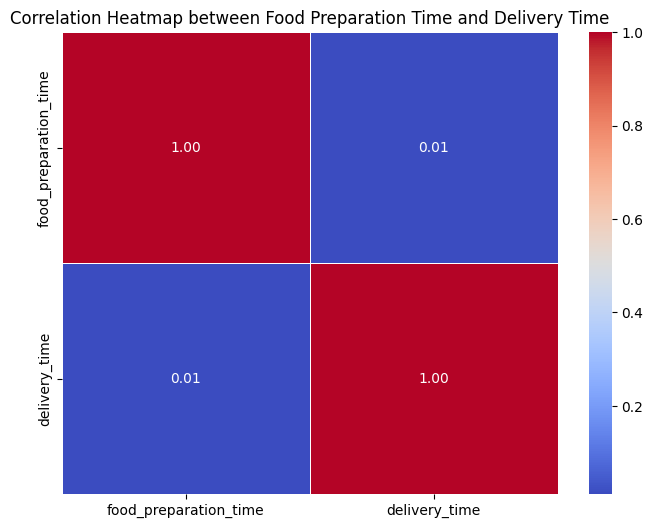

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Food Preparation Time and Delivery Time')
plt.show()

In [ ]:

correlation_delivery_rating = df['delivery_time'].corr(df['rating'])

print("The correlation between delivery time and customer ratings is",correlation_delivery_rating)


The correlation between delivery time and customer ratings is -0.009867069890174676


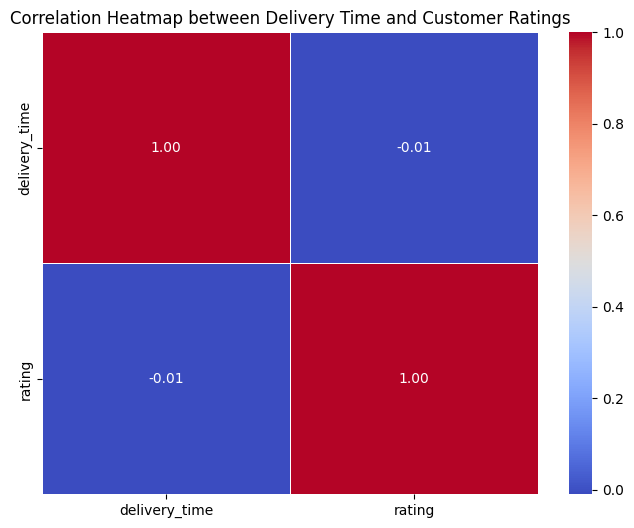

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['delivery_time', 'rating']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Delivery Time and Customer Ratings')
plt.show()

###CUSTOMER INSIGHTS:

•	What is the repeat order rate (number of customers who have placed more than one order)?

•	What percentage of orders receive a rating of 4 or higher?



In [ ]:

orders_per_customer = df.groupby('customer_id').size()


repeat_customers = orders_per_customer[orders_per_customer > 1].count()

print("The number of customers who have placed more than one order is",repeat_customers)


The number of customers who have placed more than one order is 416


In [ ]:

high_rating_orders = df[df['rating'] >= 4].shape[0]


total_orders = df.shape[0]


percentage_high_rating_orders = (high_rating_orders / total_orders) * 100

print("The percentage of orders that receive a rating of 4 or higher is",percentage_high_rating_orders)


The percentage of orders that receive a rating of 4 or higher is 51.31717597471022


###**THANKYOU!!**